In [3]:
#Importing required libraries
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn import metrics
from sklearn import tree

#Loading the iris data
data = load_iris()
print('Classes to predict: ', data.target_names)
print('Features: ', data.feature_names)


Classes to predict:  ['setosa' 'versicolor' 'virginica']
Features:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [4]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:

import pandas as pd
iris = pd.DataFrame(data.data)
print(iris.head())

iris.columns = data.feature_names
iris.head()


     0    1    2    3
0  5.1  3.5  1.4  0.2
1  4.9  3.0  1.4  0.2
2  4.7  3.2  1.3  0.2
3  4.6  3.1  1.5  0.2
4  5.0  3.6  1.4  0.2


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
iris['class'] = data.target
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [7]:
#Extracting data attributes
X = iris.iloc[:,0:4]
### Extracting target/ class labels
y = iris.iloc[:,4] 

print('Number of examples in the data:', X.shape)

#First four rows in the variable 'X'
print(X[:4])
y.head(4)


Number of examples in the data: (150, 4)
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2


0    0
1    0
2    0
3    0
Name: class, dtype: int32

In [22]:
#Using the train_test_split to create train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 20, train_size = 0.7)

#Importing the Decision tree classifier from the sklearn library.
#from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

#Training the decision tree classifier. 
clf.fit(X_train, y_train)

#Predicting labels on the test set.
y_pred_test =  clf.predict(X_test)

y_pred_train=clf.predict(X_train)


In [23]:
#Importing the accuracy metric from sklearn.metrics library
from sklearn.metrics import accuracy_score
print('Accuracy Score on train data: ', accuracy_score(y_true=y_train, y_pred=y_pred_train)*100)
print('Accuracy Score on test data: ', accuracy_score(y_true=y_test, y_pred=y_pred_test)*100)

Accuracy Score on train data:  100.0
Accuracy Score on test data:  88.88888888888889


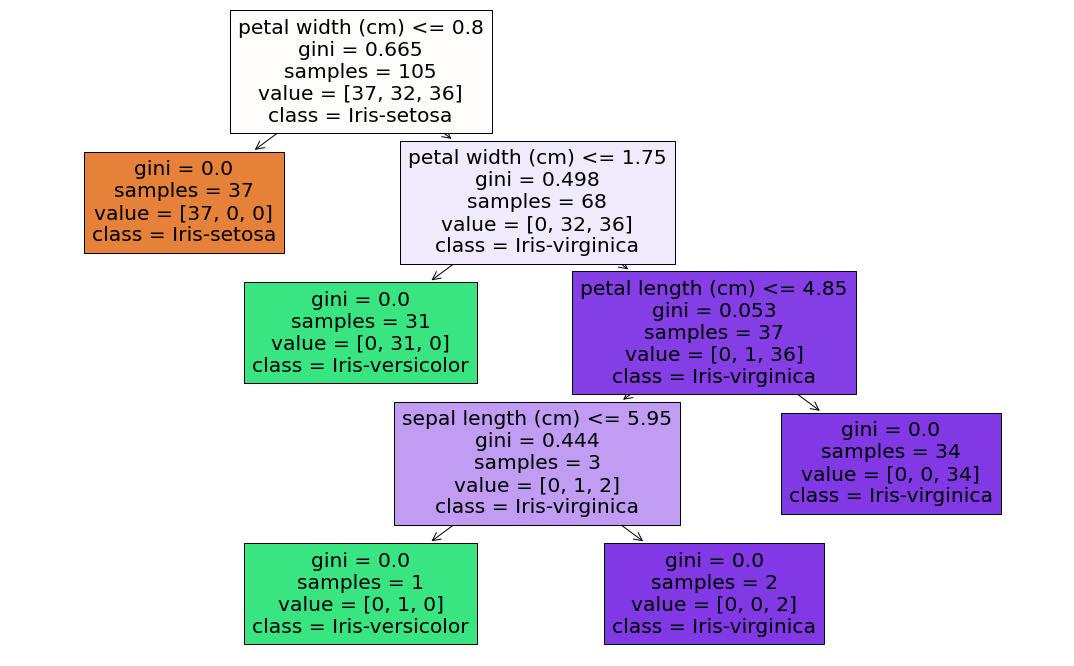

In [28]:
from sklearn.tree import plot_tree
plt.figure(figsize=(19,12))
features = X.columns
classes = ['Iris-setosa','Iris-versicolor', 'Iris-virginica']
plot_tree(clf,feature_names=features,class_names=classes,filled=True)
plt.show()



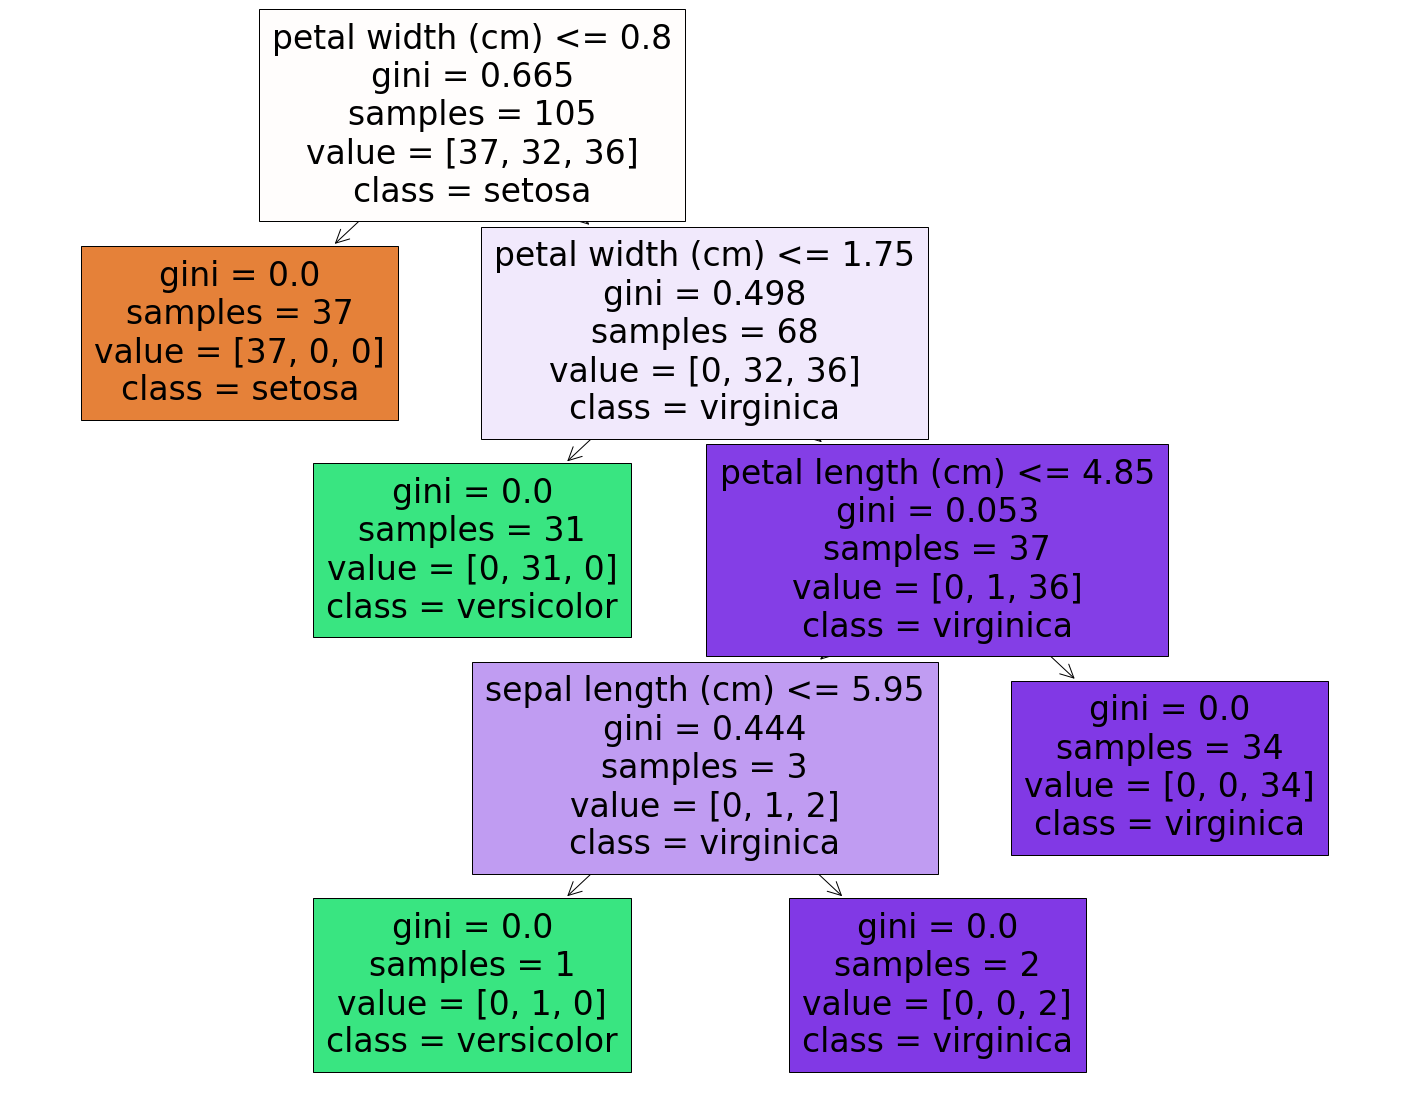

In [29]:

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=X.columns,  
                   class_names=["setosa", "versicolor" ,"virginica"],
                   filled=True)

Decision Tree Pre-Pruning

In [51]:
#pre-pruning
max_depth = []
acc = []
for i in range(1,30):
 dt_classifier = DecisionTreeClassifier(max_depth=i, random_state = 20)
 dt_classifier.fit(X_train, y_train)
 pred = dt_classifier.predict(X_test)
 acc.append(accuracy_score(y_test, pred))
 max_depth.append(i)
print(max(acc))

0.8888888888888888


In [53]:
print(acc)

[0.6, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888]


In [54]:
depth = acc.index(max(acc)) + 1
depth

2

In [55]:
dt_classifier = DecisionTreeClassifier(max_depth=depth, random_state = 20)
dt_classifier.fit(X_train, y_train)
pred = dt_classifier.predict(X_test)
#pred
accuracy_score(y_test, pred)

0.8888888888888888

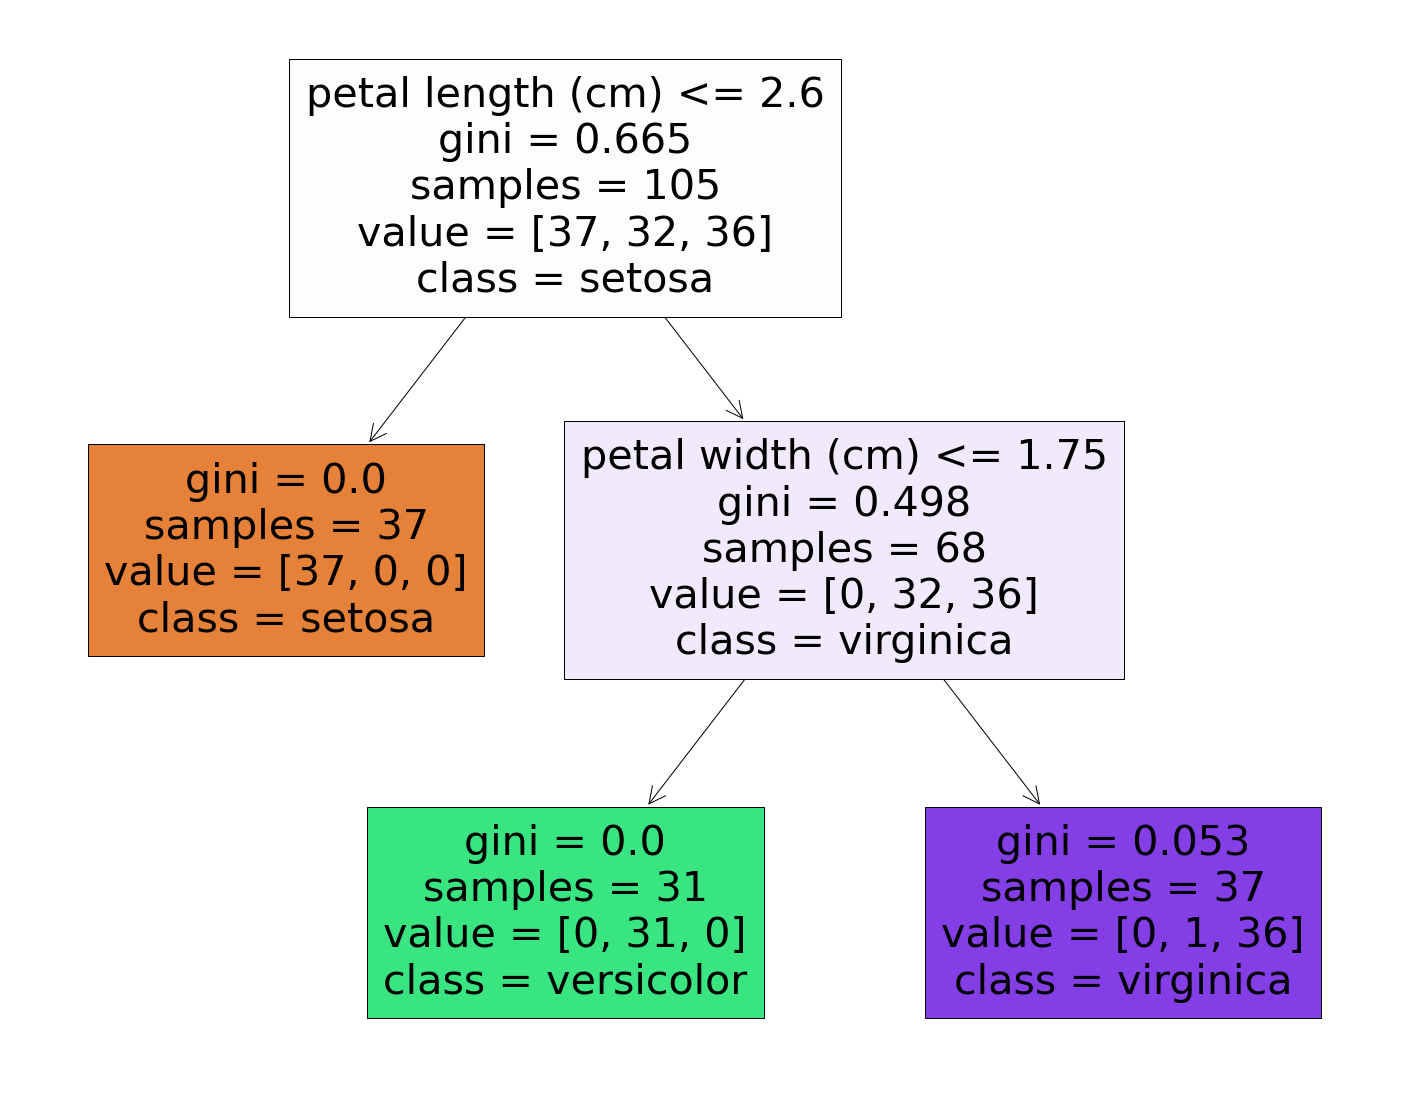

In [56]:

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt_classifier, 
                   feature_names=X.columns,  
                   class_names=["setosa", "versicolor" ,"virginica"],
                   filled=True)

In [57]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

#params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
params = {"criterion": ["gini", "entropy"],
              "min_samples_split": [2, 5, 10, 15, 20],
              "max_depth": [None, 2, 3, 5, 7, 10],
              "min_samples_leaf": [1, 3, 5, 7, 10],
              "max_leaf_nodes": [None, 3, 5, 7, 10, 15, 20],
              }
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=20), params,cv=10, scoring='accuracy')

grid_search_cv.fit(X_train, y_train)

grid_search_cv.best_estimator_

# By default, GridSearchCV trains the best model found on the whole training set (you can change this by setting refit=False), 
#so we don't need to do it again. We can simply evaluate the model's accuracy:
y_pred = grid_search_cv.predict(X_test)
accuracy_score(y_test, y_pred)

0.8888888888888888

Decision Tree Post-Pruning

In [37]:
#Using the train_test_split to create train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 20, train_size = 0.7)

#Importing the Decision tree classifier from the sklearn library.
#from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=20)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)


[0.         0.00926641 0.30415626 0.34270775]


In [39]:
# For each alpha we will append our model to a list
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=20, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

We will remove the last element in clfs and ccp_alphas, because it is the trivial tree with only one node.

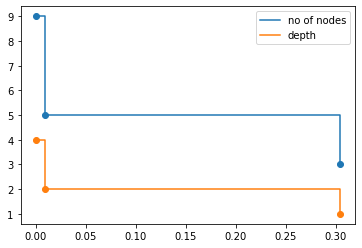

In [40]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
plt.scatter(ccp_alphas,node_counts)
plt.scatter(ccp_alphas,depth)
plt.plot(ccp_alphas,node_counts,label='no of nodes',drawstyle="steps-post")
plt.plot(ccp_alphas,depth,label='depth',drawstyle="steps-post")
plt.legend()
plt.show()

Observation: As alpha increases no of nodes and depth decreases

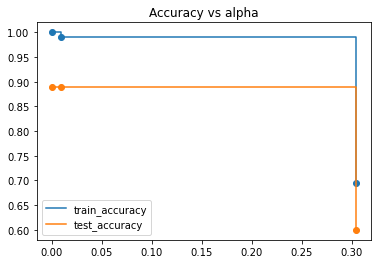

In [41]:
train_acc = []
test_acc = []
for c in clfs:
    y_train_pred = c.predict(X_train)
    y_test_pred = c.predict(X_test)
    train_acc.append(accuracy_score(y_train_pred,y_train))
    test_acc.append(accuracy_score(y_test_pred,y_test))

plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,test_acc)
plt.plot(ccp_alphas,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas,test_acc,label='test_accuracy',drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs alpha')
plt.show()

We can choose alpha = 0.05 as we get the maximum Test Accuracy = 0.93 along with optimum train accuracy there. Although our Train Accuracy has decreased to 0.96, our model is now more generalized and it will perform better on unseen data.

In [44]:
clf_ = DecisionTreeClassifier(random_state=20,ccp_alpha=0.05)
clf_.fit(X_train,y_train)
y_train_pred = clf_.predict(X_train)
y_test_pred = clf_.predict(X_test)

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')

Train score 0.9904761904761905
Test score 0.8888888888888888


We can see that now our model is not overfiting and performance on test data has improved.

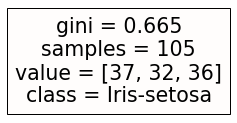

In [46]:
plt.figure(figsize=(4,2))
features = X.columns
classes = ['Iris-setosa','Iris-versicolor', 'Iris-virginica']
plot_tree(clf,feature_names=features,class_names=classes,filled=True)
plt.show()

We can see that the size of decision tree significantly got reduced. 
It can also be observed that postpruning is much efficient than prepruning.